# ANALIZA PODATKOV

In [16]:
import pandas as pd
import analiza_funkcije
import html
import matplotlib.pyplot as plt

filmi = pd.read_csv("filmi.csv")

In [17]:
filmi["naslov"] = filmi["naslov"].map(html.unescape)

In [18]:
filmi.loc[filmi["naslov"] == "Diary of a Wimpy Kid: Rodrick Rules", "leto"] = 2011
#na spletni strani je leto izdaje tega filma napačno napisano kot 2022 namesto 2011

In [19]:
filmi["leto"] = filmi["leto"].astype("Int64")
#en film nima napisanega leta, kar je spremenilo integerje v floate
filmi["ocena_rotten_tomatoes"] = filmi["ocena_rotten_tomatoes"].astype("Int64")

In [20]:
filmi["razlika_v_ocenah"] = abs(filmi["ocena_rotten_tomatoes"] / 10 - filmi["ocena_imdb"])

In [21]:
filmi["povprecna_ocena"] = (filmi["ocena_imdb"] + filmi["ocena_rotten_tomatoes"] / 10) / 2

In [22]:
filmi["desetletje"] = (filmi["leto"] // 10) * 10

In [23]:
filmi["visja_ocena"] = filmi.apply(analiza_funkcije.doloci_visjo_oceno, axis=1)

In [24]:
filmi

,naslov,leto,ocena_rotten_tomatoes,ocena_imdb,razlika_v_ocenah,povprecna_ocena,desetletje,visja_ocena
0,Modern Problems,1981,<NA>,5.1,<NA>,<NA>,1980,Ni podatkov
1,Sharky's Machine,1981,86,6.4,2.2,7.5,1980,Rotten Tomatoes
2,Absence of Malice,1981,81,6.9,1.2,7.5,1980,Rotten Tomatoes
3,On Golden Pond,1981,93,7.6,1.7,8.45,1980,Rotten Tomatoes
4,Richard Pryor: Live on the Sunset Strip,1982,40,7.6,3.6,5.8,1980,IMDb
...,...,...,...,...,...,...,...,...
1166,Bad Boys for Life,2020,76,6.5,1.1,7.05,2020,Rotten Tomatoes
1167,Birds of Prey (And the Fantabulous Emancipatio...,2020,79,6.1,1.8,7.0,2020,Rotten Tomatoes
1168,Sonic the Hedgehog,2020,64,6.5,0.1,6.45,2020,IMDb
1169,The Invisible Man,2020,92,7.1,2.1,8.15,2020,Rotten Tomatoes


In [25]:
filmi.groupby("desetletje").count()["naslov"]

desetletje
1980    172
1990    284
2000    377
2010    332
2020      5
Name: naslov, dtype: int64

In [26]:
filmi.groupby("visja_ocena").count()["naslov"]

visja_ocena
Enako               21
IMDb               677
Ni podatkov         14
Rotten Tomatoes    459
Name: naslov, dtype: int64

In [63]:
filmi.dropna().sort_values("razlika_v_ocenah", ascending=False)

,naslov,leto,ocena_rotten_tomatoes,ocena_imdb,razlika_v_ocenah,povprecna_ocena,desetletje,visja_ocena
18,The Toy,1982,4,5.8,5.4,3.1,1980,IMDb
200,Oscar,1991,12,6.5,5.3,3.85,1990,IMDb
130,Cocktail,1988,7,5.9,5.2,3.3,1980,IMDb
276,Major League II,1994,5,5.6,5.1,3.05,1990,IMDb
103,Police Academy 4: Citizens on Patrol,1987,0,5.0,5.0,2.5,1980,IMDb
...,...,...,...,...,...,...,...,...
790,Gran Torino,2008,81,8.1,0.0,8.1,2000,Enako
574,Pirates of the Caribbean: The Curse of the Bla...,2003,80,8.0,0.0,8.0,2000,Enako
117,Throw Momma From the Train,1987,63,6.3,0.0,6.3,1980,Enako
520,Black Hawk Down,2001,77,7.7,0.0,7.7,2000,Enako


In [66]:
filmi.dropna().sort_values("ocena_imdb", ascending=False)

,naslov,leto,ocena_rotten_tomatoes,ocena_imdb,razlika_v_ocenah,povprecna_ocena,desetletje,visja_ocena
774,The Dark Knight,2008,94,9.0,0.4,9.2,2000,Rotten Tomatoes
594,The Lord of the Rings: The Return of the King,2003,93,8.9,0.4,9.1,2000,Rotten Tomatoes
295,Pulp Fiction,1994,92,8.9,0.3,9.05,1990,Rotten Tomatoes
447,Fight Club,1999,79,8.8,0.9,8.35,1990,IMDb
287,Forrest Gump,1994,70,8.8,1.8,7.9,1990,IMDb
...,...,...,...,...,...,...,...,...
664,The Fog,2005,4,3.7,3.3,2.05,2000,IMDb
29,Jaws 3-D,1983,11,3.7,2.6,2.4,1980,IMDb
752,Meet the Spartans,2008,2,2.8,2.6,1.5,2000,IMDb
753,Hannah Montana & Miley Cyrus: Best of Both Wor...,2008,71,2.6,4.5,4.85,2000,Rotten Tomatoes


In [67]:
filmi.dropna().sort_values("ocena_rotten_tomatoes", ascending=False)

,naslov,leto,ocena_rotten_tomatoes,ocena_imdb,razlika_v_ocenah,povprecna_ocena,desetletje,visja_ocena
56,The Terminator,1984,100,8.0,2.0,9.0,1980,Rotten Tomatoes
326,Toy Story,1995,100,8.3,1.7,9.15,1990,Rotten Tomatoes
453,Toy Story 2,1999,100,7.9,2.1,8.95,1990,Rotten Tomatoes
568,Finding Nemo,2003,99,8.1,1.8,9.0,2000,Rotten Tomatoes
10,E.T. the Extra-Terrestrial,1982,99,7.8,2.1,8.85,1980,Rotten Tomatoes
...,...,...,...,...,...,...,...,...
752,Meet the Spartans,2008,2,2.8,2.6,1.5,2000,IMDb
120,Police Academy 5: Assignment Miami Beach,1988,0,4.6,4.6,2.3,1980,IMDb
103,Police Academy 4: Citizens on Patrol,1987,0,5.0,5.0,2.5,1980,IMDb
192,Graveyard Shift,1990,0,5.0,5.0,2.5,1990,IMDb


In [68]:
filmi.dropna().sort_values("povprecna_ocena", ascending=False)

,naslov,leto,ocena_rotten_tomatoes,ocena_imdb,razlika_v_ocenah,povprecna_ocena,desetletje,visja_ocena
774,The Dark Knight,2008,94,9.0,0.4,9.2,2000,Rotten Tomatoes
326,Toy Story,1995,100,8.3,1.7,9.15,1990,Rotten Tomatoes
189,Goodfellas,1990,96,8.7,0.9,9.15,1990,Rotten Tomatoes
594,The Lord of the Rings: The Return of the King,2003,93,8.9,0.4,9.1,2000,Rotten Tomatoes
197,The Silence of the Lambs,1991,96,8.6,1.0,9.1,1990,Rotten Tomatoes
...,...,...,...,...,...,...,...,...
1094,Boo 2! a Madea Halloween,2017,4,3.9,3.5,2.15,2010,IMDb
378,Speed 2: Cruise Control,1997,4,3.9,3.5,2.15,1990,IMDb
664,The Fog,2005,4,3.7,3.3,2.05,2000,IMDb
752,Meet the Spartans,2008,2,2.8,2.6,1.5,2000,IMDb


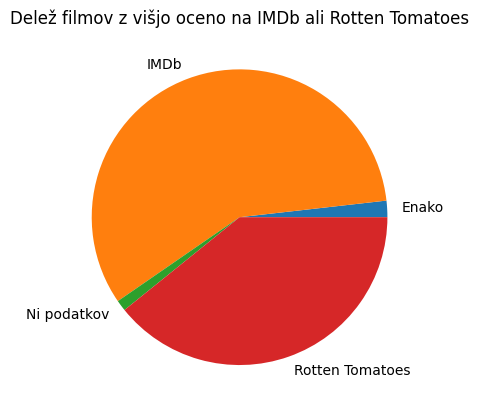

In [28]:
filmi.groupby("visja_ocena")["naslov"].count().plot.pie(title="Delež filmov z višjo oceno na IMDb ali Rotten Tomatoes", ylabel="");

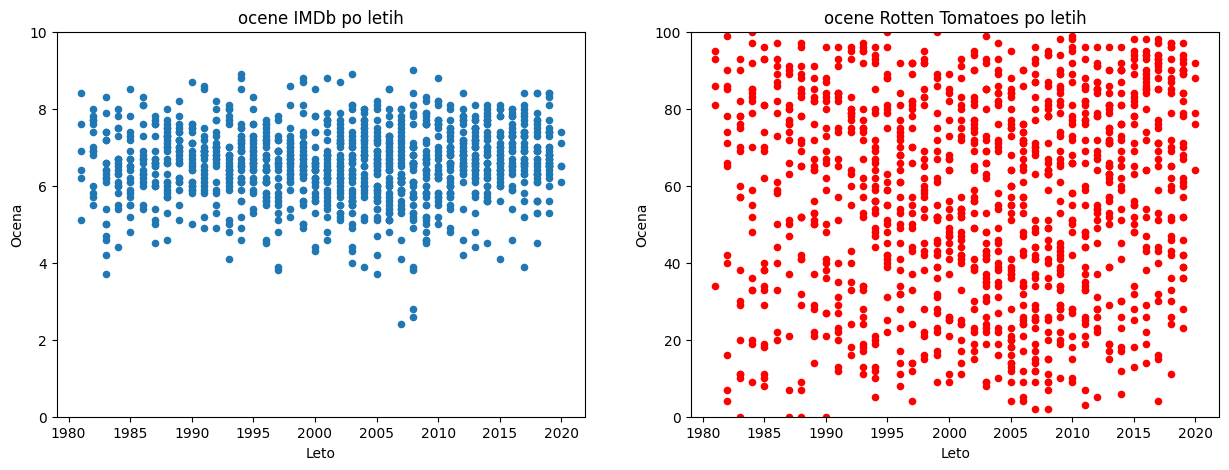

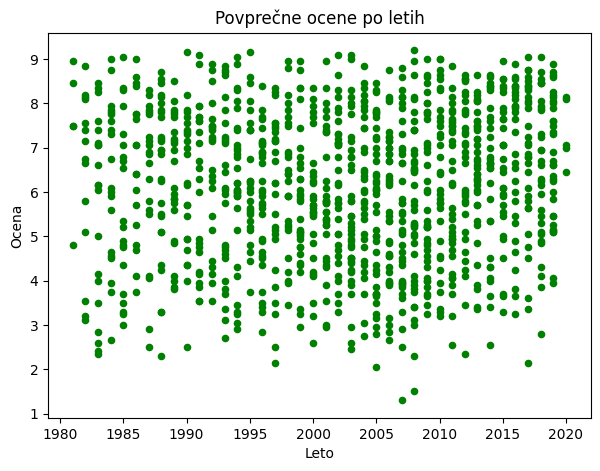

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


filmi[["leto", "ocena_imdb"]].plot.scatter(x="leto", y="ocena_imdb", title="ocene IMDb po letih", ax=ax[0], ylabel="Ocena", xlabel="Leto")
ax[0].set_ylim(0, 10)
filmi[["leto", "ocena_rotten_tomatoes"]].plot.scatter(x="leto", y="ocena_rotten_tomatoes", color="red", title="ocene Rotten Tomatoes po letih", ax=ax[1], 
                                                      ylabel="Ocena", xlabel="Leto")
ax[1].set_ylim(0, 100)

filmi[["leto", "povprecna_ocena"]].plot.scatter(x="leto", y="povprecna_ocena", title="Povprečne ocene po letih", color="green", figsize=(7, 5), 
                                                ylabel="Ocena", xlabel="Leto");

In [57]:
ocene_po_letih = filmi.groupby("leto").agg({
    "ocena_imdb": "mean",
    "povprecna_ocena": "mean",
    "ocena_rotten_tomatoes": "mean"
})

ocene_po_letih["ocena_rotten_tomatoes"] = ocene_po_letih["ocena_rotten_tomatoes"] / 10

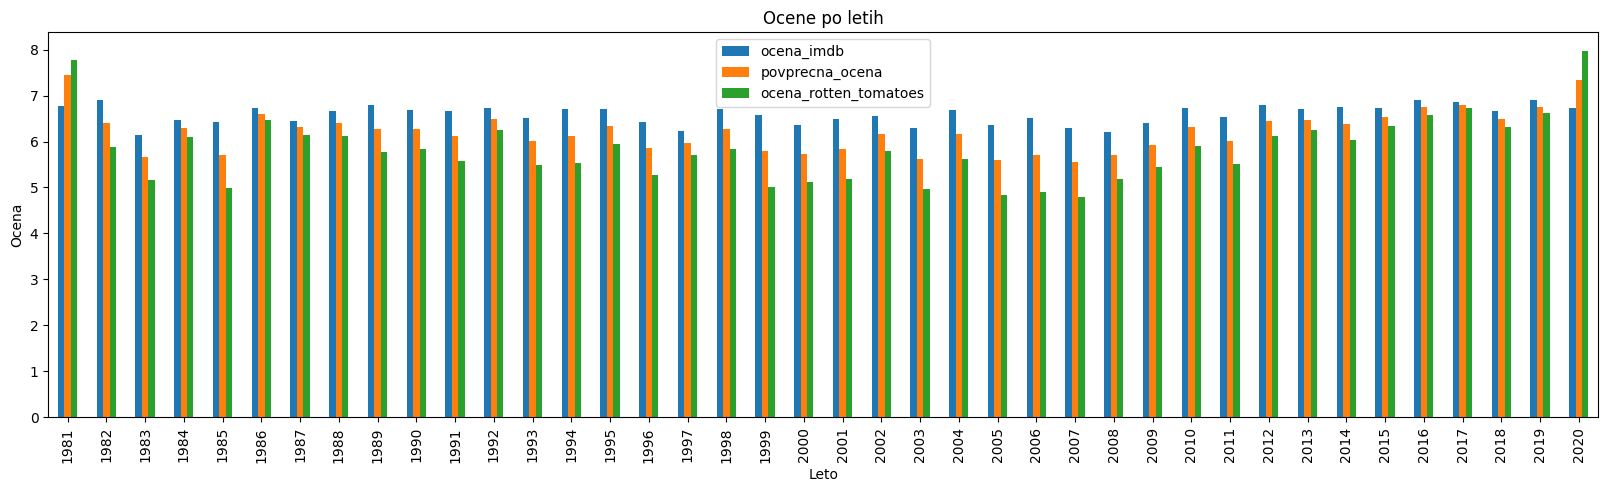

In [58]:
ocene_po_letih.plot.bar(figsize=(20, 5), xlabel="Leto", ylabel="Ocena", title="Ocene po letih");

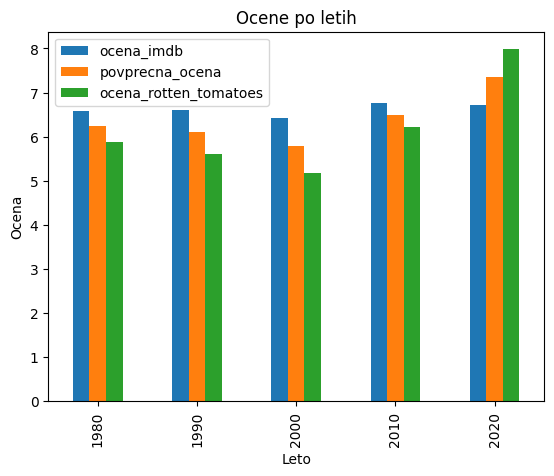

In [55]:
ocene_po_desetletjih = filmi.groupby("desetletje").agg({
    "ocena_imdb": "mean",
    "povprecna_ocena": "mean",
    "ocena_rotten_tomatoes": "mean"
})

ocene_po_desetletjih["ocena_rotten_tomatoes"] = ocene_po_desetletjih["ocena_rotten_tomatoes"] / 10

ocene_po_desetletjih.plot.bar(xlabel="Leto", ylabel="Ocena", title="Ocene po letih");